In [2]:
import os
import pandas as pd


#### Reading all CSV files in a single DataFrame 
##### ignore_index is required , otherwise it will duplicate the idexes in final frame

In [3]:
path='Sales_Data'
if os.path.exists(path):
    files=os.listdir(path)
sales_data_year=pd.DataFrame()
if len(files) !=0:
    for file in files:
        sales_data=pd.read_csv(path+'/'+file,sep=',')
        sales_data_year=pd.concat([sales_data_year,sales_data],ignore_index=True) 
sales_data_year.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
# Find NAN values
#print(sales_data_year.isna()) # checks on whole DataFrame
#print(sales_data_year.isna().any()) # checks on columnwise 
#print(sales_data_year.isna().any(axis=1)) # checks on row
#all_na=sales_data_year[sales_data_year.isna().any(axis=1)]
#display(all_na)
sales_data_year=sales_data_year.dropna(how="all") # all na rows dropped
display(sales_data_year)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### What was the best month for sales? How much was earned that month?

#### Cleaning the Data for best month sales calculation

#### Ist method for caculating month value
###### Faced the problems having month value as "Or" . 

In [5]:
#sales_data_year['Date_Time']=pd.to_datetime(sales_data_year['Order Date'],format='%m%d%y:%H:%M')
#sales_data_year
#sales_data_year['Sale_Month'] = pd.to_datetime(sales_data_year['Order Date']).dt.month
#sales_data_year.head()
sales_data_year['Month'] = sales_data_year['Order Date'].str[0:2]
sales_data_year = sales_data_year[sales_data_year['Month']!='Or']
#sales_data_year[sales_data_year[]]
#sales_data_year[((sales_data_year["Order ID"] =="177052") | (sales_data_year["Order ID"] =="237171"))]
#sales_data_year.loc[[516,517,518,522],]
#temp=sales_data_year[sales_data_year['Month']=='Or']
#temp.head()
sales_data_year['Month'] = sales_data_year['Month'].astype('int32')
display(sales_data_year)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


#### Second Method for Calculating Month2 value

In [6]:
sales_data_year['Month2'] = pd.to_datetime(sales_data_year['Order Date']).dt.month
sales_data_year

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,9


#### Caculating sales value per item

In [7]:
sales_data_year['Quantity Ordered'] = sales_data_year['Quantity Ordered'].astype('int32')
sales_data_year['Price Each'] = sales_data_year['Price Each'].astype('float')
sales_data_year['SalesItemwise'] = (sales_data_year['Price Each'] * sales_data_year['Quantity Ordered'])
display(sales_data_year)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month2,SalesItemwise
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,11.99
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,9,379.99


#### Calculating Best Month for sale

In [8]:
sales_data_year.groupby('Month2').sum()

,Quantity Ordered,Price Each,Month,SalesItemwise
Month2,,,,
1,10903,1.811768e+06,9709,1.822257e+06
2,13449,2.188885e+06,23950,2.202022e+06
3,17005,2.791208e+06,45459,2.807100e+06
4,20558,3.367671e+06,73116,3.390670e+06
5,18667,3.135125e+06,82830,3.152607e+06
6,15253,2.562026e+06,81324,2.577802e+06
7,16072,2.632540e+06,100051,2.647776e+06
8,13448,2.230345e+06,95688,2.244468e+06
9,13109,2.084992e+06,104589,2.097560e+06


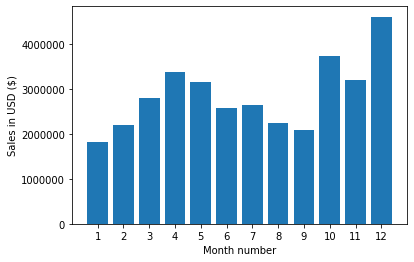

In [10]:
import matplotlib.pyplot as plt
months=range(1,13)

plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.bar(months,sales_data_year.groupby('Month2').sum()['SalesItemwise'])
plt.show()


### Which City Sold the most product

In [12]:
def getCity(address):
    return address.split(',')[1].strip()
def getState(address):
    #return address.split(',')[2].strip()[0:3].strip()
    #or can be written as below
    return address.split(',')[2].strip().split(' ')[0]
    #return address.split(",")[2].split(" ")[1]
    
sales_data_year['City']= sales_data_year['Purchase Address'].apply(lambda x: f"{getCity(x)} ({getState(x)})" )
sales_data_year.groupby('City').sum()

,Quantity Ordered,Price Each,Month,Month2,SalesItemwise
City,,,,,
Atlanta (GA),16602,2.779908e+06,104794,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,315520,8.262204e+06


### Bar Chart for City sales

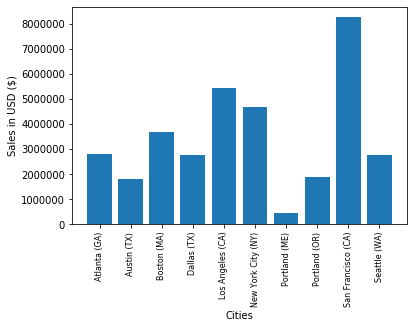

In [17]:
months=range(1,13)

keys = [city for city, df in sales_data_year.groupby(['City'])]
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities')
plt.bar(keys,sales_data_year.groupby('City').sum()['SalesItemwise'])
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

### What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [19]:
sales_data_year['Hour'] = pd.to_datetime(sales_data_year['Order Date']).dt.hour
sales_data_year['Minute'] = pd.to_datetime(sales_data_year['Order Date']).dt.minute
sales_data_year['Count'] = 1


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month2,SalesItemwise,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,11.99,Los Angeles (CA),9,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,9,8.97,Los Angeles (CA),20,56,1
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,9,700.00,San Francisco (CA),16,0,1
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,9,700.00,San Francisco (CA),7,39,1
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,9,379.99,San Francisco (CA),17,30,1


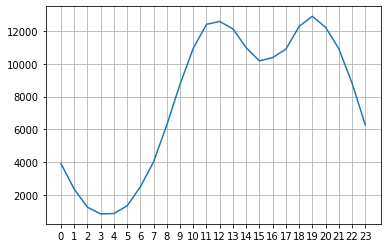

In [25]:
keys = [pair for pair, df in sales_data_year.groupby(['Hour'])]

plt.plot(keys, sales_data_year.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()